In [ ]:
# Drop 

In [33]:
# All imports
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [34]:
# load the data

df = pd.read_csv("./data/day.csv")

In [35]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [36]:
df.shape

(730, 16)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [38]:
# null check
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [39]:
# Seems nothing is null in dataset. Good.

In [40]:
# Lets drop instant, ddate, atemp, casual, registered. Instant does not give any information. atemp is similar to temp.
# casual and registered are already summed up in total count.

df.drop(['instant','dteday','casual','registered','atemp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [41]:
# lets see the summary stats for the data.
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,8714.000000


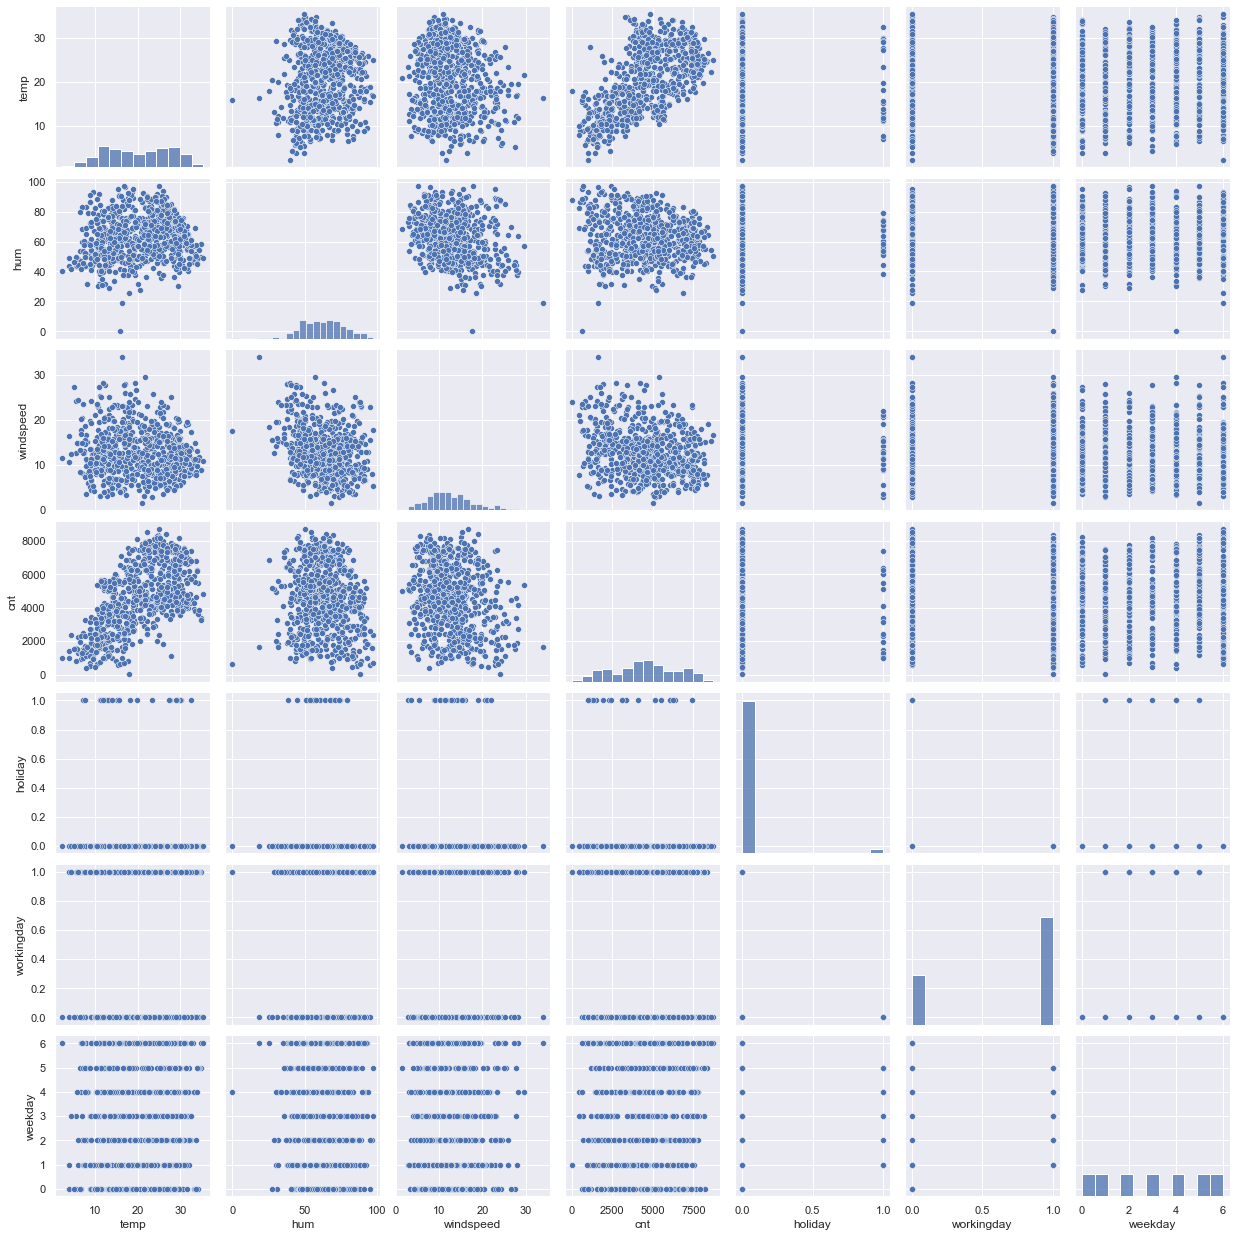

In [42]:
# lets plot the data and see if some information comes out.

sns.pairplot(df, vars=["temp", "hum",'windspeed','cnt', 'holiday', 'workingday', 'weekday'])
plt.show()

<AxesSubplot:xlabel='season', ylabel='cnt'>

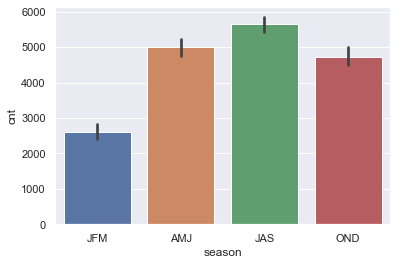

In [43]:
# Let's encode the data starting with season. 
# JFM -> January, February, March and so on.

def map_season(x):
    return x.map({1:'JFM',2:'AMJ',3:'JAS',4:'OND'})

df[['season']]= df[['season']].apply(map_season)
sns.barplot('season','cnt',data=df)

#### Seems the demans is High in July-Aug-Sep month.

### lets encode the month and see the trend

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

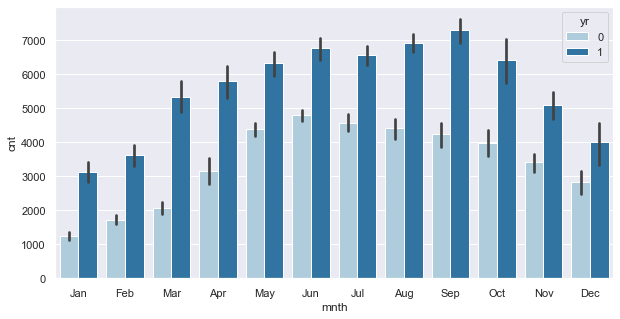

In [44]:
def map_month(x):
    return x.map({
        1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
        7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
    })
df[['mnth']] = df[['mnth']].apply(map_month)
plt.figure(figsize=(10,5))
sns.barplot('mnth','cnt',hue='yr',data=df,palette='Paired')

### July sees a dip from June, which can be attributed to new rains. But then demand picks in Aug and September. There is also an increase in rental demand from January, which picks around September and then goes down. This can be attributed to holidays in OND quarter.



<AxesSubplot:xlabel='workingday', ylabel='cnt'>

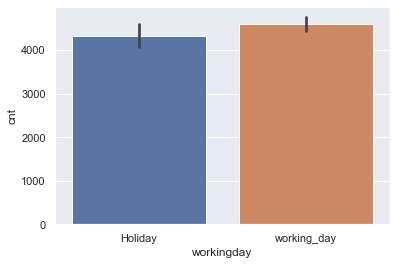

In [45]:
# Lets see the effect of holidays or working day in bike rental.

day = {1:'working_day',0:'Holiday'}
df['workingday'] = df['workingday'].map(day)
sns.barplot('workingday','cnt',data=df)

##### Shows that working day has more demand than holidays.

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

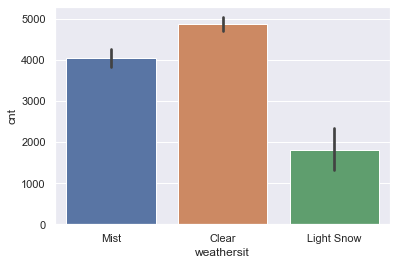

In [46]:
# Lets see the same for weather too.

def map_weather(x):
    return x.map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

df[['weathersit']] = df[['weathersit']].apply(map_weather)
sns.barplot('weathersit','cnt',data=df)

##### Clear weather results in more demand.

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

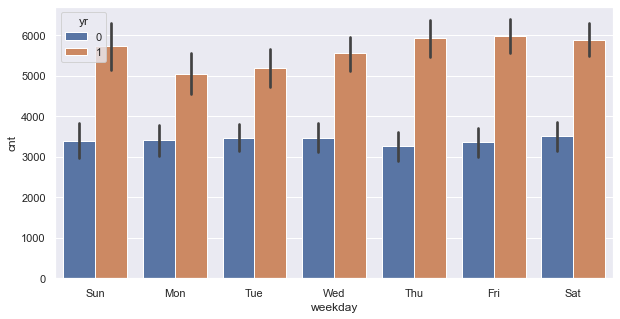

In [47]:
def map_weekday(x):
    return x.map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

df[['weekday']] = df[['weekday']].apply(map_weekday)
plt.figure(figsize=(10,5))
sns.barplot('weekday','cnt',hue='yr',data=df)

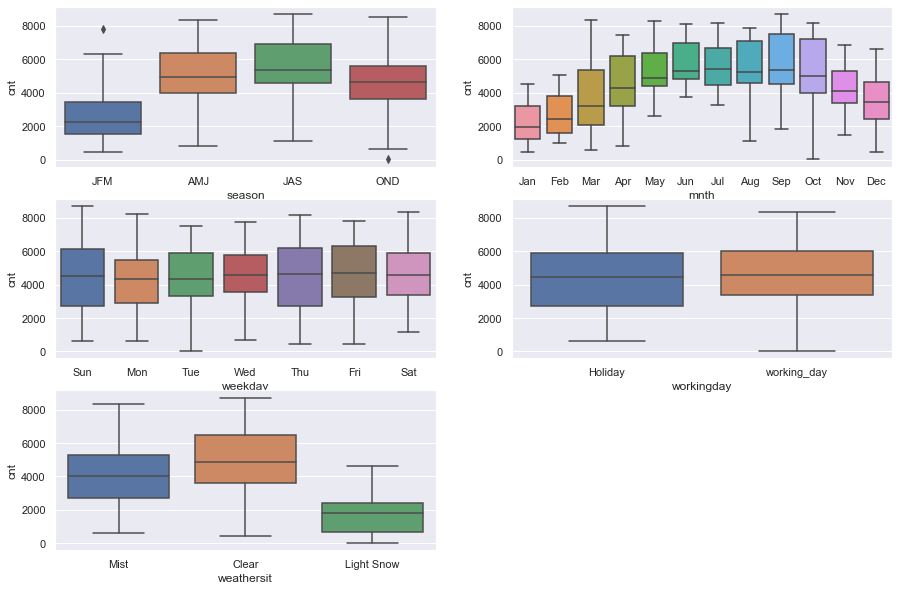

In [48]:
# Let's visualize the categorical variables and see the pattern of demand with each variable.
plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
sns.boxplot(x='season', y='cnt',data=df)

plt.subplot(3,2,2)
sns.boxplot(x='mnth', y='cnt',data=df)

plt.subplot(3,2,3)
sns.boxplot(x='weekday', y='cnt',data=df)

plt.subplot(3,2,4)
sns.boxplot(x='workingday', y='cnt',data=df)

plt.subplot(3,2,5)
sns.boxplot(x='weathersit', y='cnt',data=df)


plt.show();

In [49]:
# Lets check the correlation and heatmaps now.

correlation = df.corr()
correlation

,yr,holiday,temp,hum,windspeed,cnt
yr,1.000000,0.008195,0.048789,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.028764,-0.015662,0.006257,-0.068764
temp,0.048789,-0.028764,1.000000,0.128565,-0.158186,0.627044
hum,-0.112547,-0.015662,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.627044,-0.098543,-0.235132,1.000000


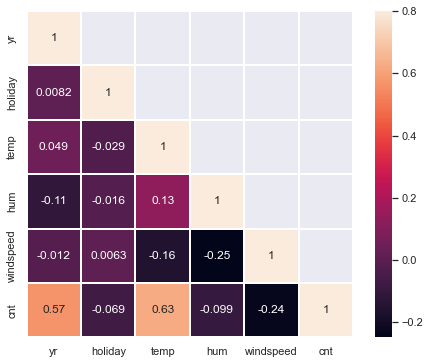

In [50]:
mask = np.array(correlation)
mask[ np.tril_indices_from(mask) ] = False
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.heatmap(correlation, mask=mask, vmax=0.8, square=True, annot=True,linewidths=2);

##### Heatmap shows that the data we have now is not very correlated and we can proceed with dummy and model creation

In [51]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,JFM,0,Jan,0,Sun,Holiday,Mist,14.110847,80.5833,10.749882,985
1,JFM,0,Jan,0,Mon,Holiday,Mist,14.902598,69.6087,16.652113,801
2,JFM,0,Jan,0,Tue,working_day,Clear,8.050924,43.7273,16.636703,1349
3,JFM,0,Jan,0,Wed,working_day,Clear,8.200000,59.0435,10.739832,1562
4,JFM,0,Jan,0,Thu,working_day,Clear,9.305237,43.6957,12.522300,1600


In [52]:
# categorical variables need to be replaced with dummy variables so that the regression models can use it. Regression models
# need the data in numerical format. So we will be replacing categorical variables with numerical variable.

# Categorical variable selection
df_cat = df.select_dtypes(exclude=['float64','int64','datetime64'])
df_cat.head()


,season,mnth,weekday,workingday,weathersit
0,JFM,Jan,Sun,Holiday,Mist
1,JFM,Jan,Mon,Holiday,Mist
2,JFM,Jan,Tue,working_day,Clear
3,JFM,Jan,Wed,working_day,Clear
4,JFM,Jan,Thu,working_day,Clear


In [53]:
# dummy creation

df_dummies = pd.get_dummies(df_cat, drop_first=True)
df_dummies.head()

,season_JAS,season_JFM,season_OND,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [54]:
# Now replace the dummy with original values.

list(df_cat.columns)


['season', 'mnth', 'weekday', 'workingday', 'weathersit']

In [55]:
df = df.drop(list(df_cat.columns), axis=1)
df.head()

,yr,holiday,temp,hum,windspeed,cnt
0,0,0,14.110847,80.5833,10.749882,985
1,0,0,14.902598,69.6087,16.652113,801
2,0,0,8.050924,43.7273,16.636703,1349
3,0,0,8.200000,59.0435,10.739832,1562
4,0,0,9.305237,43.6957,12.522300,1600


In [56]:
df = pd.concat([df,df_dummies], axis=1)
df.head()

,yr,holiday,temp,hum,windspeed,cnt,season_JAS,season_JFM,season_OND,mnth_Aug,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist
0,0,0,14.110847,80.5833,10.749882,985,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,8.050924,43.7273,16.636703,1349,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,8.200000,59.0435,10.739832,1562,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,9.305237,43.6957,12.522300,1600,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


# Let's start building the model now we have all things related to data in place.


In [58]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 0)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [63]:
# Apply scaler() to all the columns except the'dummy' variables. Scalar will help us scaling to unit variance.

num_vars=['temp','hum','windspeed','cnt']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])
df_test[num_vars]= scaler.transform(df_test[num_vars])

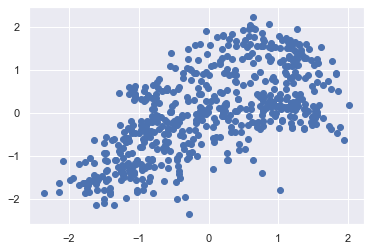

In [64]:
plt.scatter('temp','cnt',data=df_train)

In [66]:
# We will be dividing X and y for train and test. Our Target variable Y is cnt (Count) in this case.

# The training set
y_train = df_train.pop('cnt')
X_train = df_train

In [68]:
# The test set

y_test = df_test.pop('cnt')
X_test = df_test

## Initial model building

In [69]:
import statsmodels.api as sm 

In [70]:
# Adding Constant
X_train_sm = sm.add_constant(X_train)

In [71]:
# Create a first fitted model
lr = sm.OLS(y_train,X_train_sm).fit()

In [72]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     105.8
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.78e-199
Time:                        16:52:20   Log-Likelihood:                -298.90
No. Observations:                 584   AIC:                             653.8
Df Residuals:                     556   BIC:                             776.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

- Here we recieved r_squared = 0.836 and adjusted r_squared = 0.828 for our test data set.
- There is a note saying about eigen value suggesting strong multi collinearity. So to check for it, we will be iterating over features using RFE.

In [73]:
# Let's predict the values first

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [74]:
y_pred = regressor.predict(X_test)


In [75]:
df1 = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})

df1.head()

,Actual,Predicted
196,0.757012,-0.066482
187,0.052646,0.077243
14,-1.717002,-1.602899
31,-1.657732,-1.882921
390,-0.220951,-0.456897


## RFE

In [76]:
from sklearn.feature_selection import RFE 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [77]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(584, 28)
(146, 28)
(584,)
(146,)


In [79]:
# Running RFE with the output number of the variable equal to 15
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [80]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 5),
 ('temp', True, 1),
 ('hum', False, 2),
 ('windspeed', False, 3),
 ('season_JAS', False, 13),
 ('season_JFM', True, 1),
 ('season_OND', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 8),
 ('mnth_Mar', False, 10),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sat', False, 11),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 4),
 ('weekday_Wed', False, 9),
 ('workingday_working_day', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [81]:
rfe_supp= X_train.columns[rfe.support_]
rfe_supp

Index(['yr', 'temp', 'season_JFM', 'season_OND', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'weekday_Sun', 'workingday_working_day', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [82]:
X_train_rfe = X_train[rfe_supp]

In [83]:
X_train_rfe.head()

,yr,temp,season_JFM,season_OND,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sep,weekday_Sun,workingday_working_day,weathersit_Light Snow,weathersit_Mist
239,0,1.169798,0,0,0,0,0,0,0,0,0,0,0,0,0
97,0,-0.849259,0,0,0,0,0,0,0,0,0,0,1,0,1
503,1,0.587516,0,0,0,0,0,0,1,0,0,1,0,0,0
642,1,0.669099,0,1,0,0,0,0,0,0,0,0,1,0,0
498,1,0.442477,0,0,0,0,0,0,1,0,0,0,1,0,1


In [84]:
# Utility functions that will be used a lot.

def build_model(X,y):
    # Model builing.
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X
    
def checkVIF(X):
    """
    VIF checking.
    
    From Wikipedia: Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature 
    variables are correlated with each other. It is an extremely important parameter to test our linear model. 
    The formula for calculating VIF is:

    VIF = 1/(1-Ri^2)
    """
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [85]:
# The first run

X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     169.7
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.10e-198
Time:                        17:16:30   Log-Likelihood:                -331.91
No. Observations:                 584   AIC:                             695.8
Df Residuals:                     568   BIC:                             765.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [86]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.98
3,season_JFM,3.84
2,temp,3.48
4,season_OND,2.37
7,mnth_Jan,2.17
6,mnth_Feb,1.91
10,mnth_Nov,1.74
13,workingday_working_day,1.63
12,weekday_Sun,1.62
5,mnth_Dec,1.57


In [90]:
# It seems the biggest VIF is from const. Rest all is less than 5 which seems okay.
X_train1= sm.add_constant(X_train_rfe)
X_train_new= X_train1.drop('const',axis=1)

In [91]:
checkVIF(X_train_new)

,Features,VIF
2,season_JFM,4.41
1,temp,3.20
12,workingday_working_day,2.86
3,season_OND,2.74
6,mnth_Jan,2.34
5,mnth_Feb,2.05
0,yr,1.91
9,mnth_Nov,1.88
4,mnth_Dec,1.71
14,weathersit_Mist,1.53


  #### So all VIF are less than 5 after dropping constant. It looks good now.

### As nextstep, we have to do residual analysis and validate that errors are normally distributed. It is one of the core assumptions of Linear Regression

In [92]:
lm1 = sm.OLS(y_train,X_train1).fit()

In [93]:
y_train_pred = lm1.predict(X_train1)

Text(0.5, 0, 'Errors')

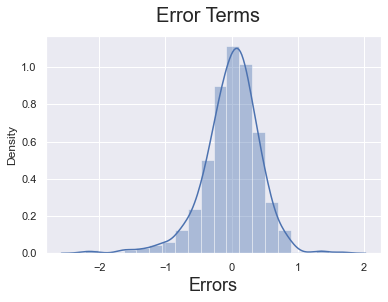

In [94]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

#### Error distribution looks good.

### Predictions and Evaluations

In [95]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [96]:
# Making predictions
y_test_pred = lm1.predict(X_test_new)

Text(0, 0.5, 'y_pred')

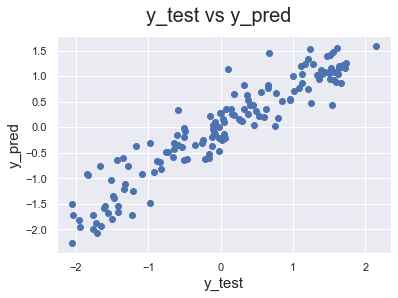

In [97]:
# Lets plot it to undestand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 15)
plt.ylabel('y_pred', fontsize = 15)  

In [98]:
# r2 score

from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8755532122060328

## Seems we have a very decent model with r2 score of 0.8755 and a proper spread of y_test vs y_pred

#### Conclusion

Top affecting factors are:

- Season JFM : -0.4397 
- month_Sep : 0.2522 
- temp : 0.4167 
- Light Snow : -1.3450 
- weekday_Sun : 0.2398 